<a href="https://colab.research.google.com/github/ylongresearch/COMP4107-ACV/blob/main/CAT2DOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("We're using =>", device)
!nvidia-smi

We're using => cuda
Mon Feb 28 17:22:54 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    26W / 250W |      2MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                    

(50000, 32, 32, 3) uint8 (50000, 1) uint8
(1, 5000)
(1, 5000)
(5000, 3, 32, 32)
(5000, 3, 32, 32)


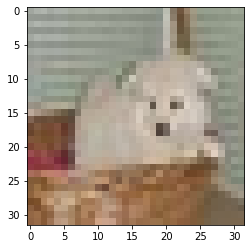

In [3]:
from keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, X_train.dtype, Y_train.shape, Y_train.dtype)
#########################
import numpy as np
import matplotlib.pyplot as plt
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

cat_idx = np.where(Y_train[:, 0] == 3)
dog_idx = np.where(Y_train[:, 0] == 5)
cat_idx_test = np.where(Y_test[:, 0] == 3)
dog_idx_test = np.where(Y_test[:, 0] == 5)

print(np.shape(cat_idx))
print(np.shape(dog_idx))
plt.imshow(X_train[dog_idx[0][4999]]) # visualise random images in range 0 to 4999
################################

cat_dog_idx = np.concatenate((cat_idx[0], dog_idx[0]))
cat_dog_idx_test = np.concatenate((cat_idx_test[0], dog_idx_test[0]))

cat_train = X_train[cat_idx]
dog_train = X_train[dog_idx]
cat_test = X_test[cat_idx_test]
dog_test = X_test[dog_idx_test]


cat_train = np.transpose(cat_train, (0,3,2,1))
dog_train = np.transpose(dog_train, (0,3,2,1))
cat_test = np.transpose(cat_test, (0,3,2,1))
dog_test = np.transpose(dog_test, (0,3,2,1))
print(np.shape(cat_train))
print(np.shape(dog_train))

In [ ]:
!pip install albumentations==0.4.6

     |████████████████████████████████| 117 kB 4.2 MB/s 
     |████████████████████████████████| 948 kB 31.2 MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-py3-none-any.whl size=65174 sha256=2671c72a5123fc347c01cbf9f38e8f453d3614c531fcda9e0a1f5805a3729be7
  Stored in directory: /root/.cache/pip/wheels/cf/34/0f/cb2a5f93561a181a4bcc84847ad6aaceea8b5a3127469616cc
Successfully built albumentations
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
import torchvision
from torch.utils.data import Dataset, DataLoader
import albumentations as A
from albumentations.pytorch import ToTensorV2

transforms = A.Compose(
    [
        A.Resize(width=256, height=256),
        A.HorizontalFlip(p=0.5),
        A.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5], max_pixel_value=255),
        ToTensorV2(),
     ],
    additional_targets={"image0": "image"},
)

class PBdataset():
    def __init__():


    def __getitem__():


    def __len__():



batch_size = 50
catdogTrainSet = 
catdogTrainLoader = 
catdogTestSet = 
catdogTestLoader = 

In [ ]:
import torch.nn as nn

class Block():
    def __init__():


    def forward():
        

class Discriminator():
    def __init__():

    def forward():
        

x = torch.randn((5, 3, 256, 256))
model = Discriminator(in_channels=3)
preds = model(x)
print(preds.shape)

torch.Size([5, 1, 30, 30])


In [ ]:
import torch.nn as nn

class ConvBlock():
    def __init__():

    def forward():


class ResidualBlock():
    def __init__():


    def forward():


class Generator():
    def __init__():


    def forward():



img_channels = 3
img_size = 256
x = torch.randn((2, img_channels, img_size, img_size))
gen = Generator(img_channels, 9)
print(gen(x).shape)

torch.Size([2, 3, 256, 256])


In [ ]:
import torch
import sys
import torch.optim as optim
from tqdm import tqdm
from torchvision.utils import save_image

LEARNING_RATE = 1e-5
LAMBDA_IDENTITY = 0.0
LAMBDA_CYCLE = 10
NUM_EPOCHS = 10
SAVE_MODEL = False
def train_fn(disc_H, disc_Z, gen_Z, gen_H, loader, opt_disc, opt_gen, l1, mse, d_scaler, g_scaler):
    H_reals = 0
    H_fakes = 0
    loop = tqdm(loader, leave=True)

    for idx, (cat, dog) in enumerate(loop):
        cat = cat.to(device)
        dog = dog.to(device)

        # Train Discriminators H and Z
        with torch.cuda.amp.autocast():
        ################### Write Discriminator Loss Here




        ##################
        opt_disc.zero_grad()
        d_scaler.scale(D_loss).backward()
        d_scaler.step(opt_disc)
        d_scaler.update()

        # Train Generators H and Z
        with torch.cuda.amp.autocast():
        ################### Write Generator Loss Here




        ##################
            

        opt_gen.zero_grad()
        g_scaler.scale(G_loss).backward()
        g_scaler.step(opt_gen)
        g_scaler.update()

        if idx % 200 == 0:
            save_image(fake_dog*0.5+0.5, f"./saved_images/dog_{idx}.png")
            save_image(fake_cat*0.5+0.5, f"./saved_images/cat_{idx}.png")

        loop.set_postfix(H_real=H_reals/(idx+1), H_fake=H_fakes/(idx+1))

In [ ]:
!mkdir saved_images

In [ ]:
def main():
    disc_H = Discriminator(in_channels=3).to(device)
    disc_Z = Discriminator(in_channels=3).to(device)
    gen_Z = Generator(img_channels=3, num_residuals=4).to(device)
    gen_H = Generator(img_channels=3, num_residuals=4).to(device)
    opt_disc = optim.Adam(
        list(disc_H.parameters()) + list(disc_Z.parameters()),
        lr=LEARNING_RATE,
        betas=(0.5, 0.999),
    )

    opt_gen = optim.Adam(
        list(gen_Z.parameters()) + list(gen_H.parameters()),
        lr=LEARNING_RATE,
        betas=(0.5, 0.999),
    )

    L1 = nn.L1Loss()
    mse = nn.MSELoss()


    g_scaler = torch.cuda.amp.GradScaler()
    d_scaler = torch.cuda.amp.GradScaler()

    for epoch in range(NUM_EPOCHS):
        train_fn(disc_H, disc_Z, gen_Z, gen_H, catdogTrainLoader, opt_disc, opt_gen, L1, mse, d_scaler, g_scaler)

if __name__ == "__main__":
    main()

100%|██████████| 100/100 [00:27<00:00,  3.69it/s, H_fake=0.394, H_real=0.599]
